
___
# LendingClub Loan Prediction

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Importing the usual libraries for pandas and plotting.**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Get the Data

** Using pandas to read loan_data.csv as a dataframe called loans.**

In [8]:
import os

os.getcwd()

os.chdir("/Users/nihithindlekar/Documents/")

In [9]:
loan = pd.read_csv("loan_data.csv")

loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [10]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [11]:
loan["purpose"].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities.

** Creating a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**



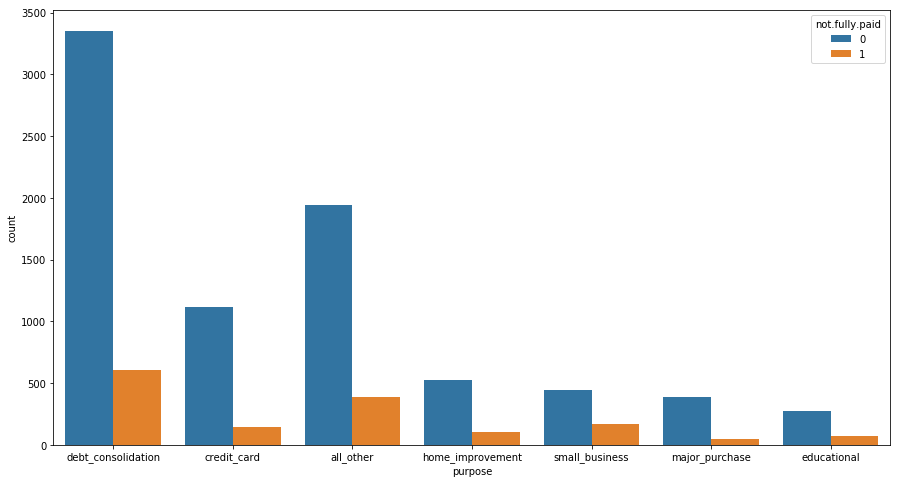

In [13]:
sns.countplot('purpose', data= loan, hue= 'not.fully.paid')
plt.rcParams["figure.figsize"]= 15,8

purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
As we can see from above plot, loans taken for the purpose of debt consolidation seems to have fully paid but there is a majority of which are not fully paid as well.

In [14]:
#Checking the number of loans paid vs unpaid
loan["not.fully.paid"].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

Text(0.5, 0, 'FICO')

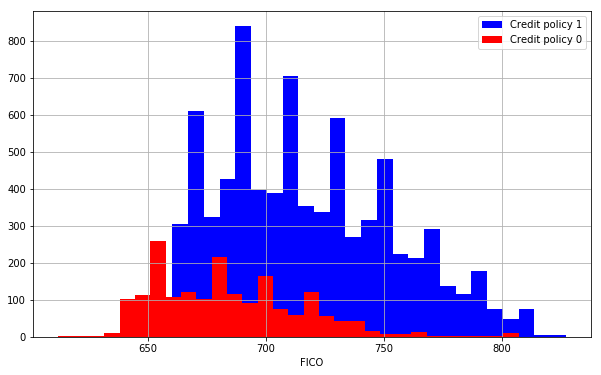

In [15]:
plt.rcParams["figure.figsize"]= 10,6
loan[loan['credit.policy']== 1]['fico'].hist(color = 'blue', label = 'Credit policy 1', bins= 30)
loan[loan['credit.policy']== 0]['fico'].hist(color = 'red', label = 'Credit policy 0', bins= 30)


plt.legend()
plt.xlabel('FICO')

** Create a similar figure, except this time select by the not.fully.paid column.**

Text(0.5, 0, 'FICO')

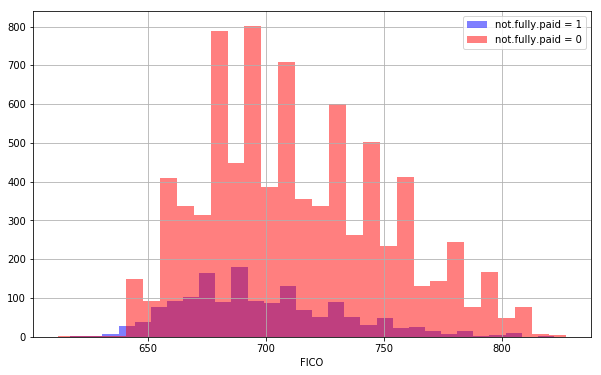

In [16]:
plt.rcParams["figure.figsize"]= 10,6
loan[loan['not.fully.paid']== 1]['fico'].hist(alpha = 0.5, color = 'blue', label = 'not.fully.paid = 1', bins= 30)
loan[loan['not.fully.paid']== 0]['fico'].hist(alpha= 0.5, color = 'red', label = 'not.fully.paid = 0', bins= 30)


plt.legend()
plt.xlabel('FICO')

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

/Users/nihithindlekar/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


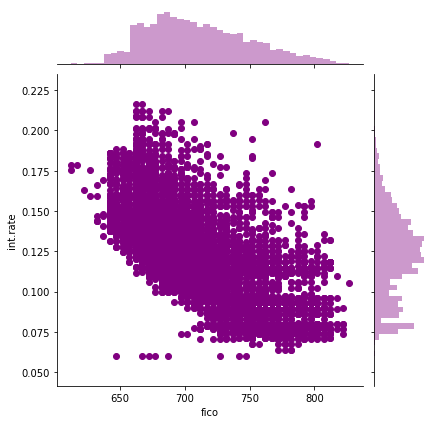

In [17]:
sns.jointplot(x='fico',y='int.rate',data=loan,color='purple')

The obvious thing to notice over here is that the interest rate goes down tremendously with gradual increase in the FICO credit score of the borrower.

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy.**

<Figure size 792x504 with 0 Axes>

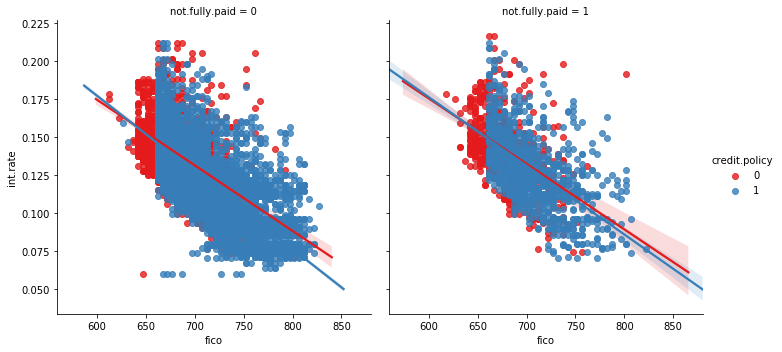

In [18]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loan,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [19]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [20]:
dum = ["purpose"]

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [21]:
final_data = pd.get_dummies(loan,columns=dum, drop_first=True )

In [22]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [83]:
from sklearn.model_selection import train_test_split

X = final_data.drop("not.fully.paid", axis=1)

y = final_data["not.fully.paid"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

## Training a Logistic Regression model

Let's start by training Logistic Regression model first!


In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
#Create an instance of LogisticRegression() called dtree and fit it to the training data.
logmod = LogisticRegression()

In [86]:
logmod.fit(X_train, y_train)

/Users/nihithindlekar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Predictions and Evaluation of Logistic Regression
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [87]:
predictions = logmod.predict(X_test)

expected = y_test

In [88]:
from sklearn import metrics

In [89]:
metrics.accuracy_score(predictions, expected)

0.8357689631176062

In [90]:
#Classification report
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2397
           1       0.65      0.02      0.04       477

   micro avg       0.84      0.84      0.84      2874
   macro avg       0.74      0.51      0.48      2874
weighted avg       0.81      0.84      0.77      2874



In [91]:
#Confusion matrix
print(metrics.confusion_matrix(y_test, predictions))

[[2391    6]
 [ 466   11]]


In [92]:
metrics.precision_score(y_test, predictions)

0.6470588235294118

In [93]:
metrics.recall_score(y_test,predictions)

0.023060796645702306

Since the false negatives are larger in this case, it rejects our business criterion.

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
#Creating an instance
dec_mod = DecisionTreeClassifier()

In [96]:
dec_mod.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [97]:
predictions = dec_mod.predict(X_test)

In [98]:
print(metrics.confusion_matrix(y_test, predictions))

[[2004  393]
 [ 375  102]]


False negatives decreased a bit

In [99]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2397
           1       0.21      0.21      0.21       477

   micro avg       0.73      0.73      0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.73      2874



In [100]:
metrics.precision_score(y_test, predictions)

0.20606060606060606

In [101]:
metrics.recall_score(y_test,predictions)

0.2138364779874214

## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rand_mod = RandomForestClassifier()

In [104]:
rand_mod.fit(X_train, y_train)

/Users/nihithindlekar/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [105]:
predictions = rand_mod.predict(X_test)

In [106]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2397
           1       0.34      0.04      0.06       477

   micro avg       0.83      0.83      0.83      2874
   macro avg       0.59      0.51      0.49      2874
weighted avg       0.75      0.83      0.77      2874



In [107]:
print(metrics.confusion_matrix(y_test, predictions))

[[2364   33]
 [ 460   17]]


In [108]:
metrics.precision_score(y_test, predictions)

0.34

In [109]:
metrics.recall_score(y_test,predictions)

0.03563941299790356

In [111]:
#Calculating the Recall score
17 / float(460 + 17)

0.03563941299790356

In [112]:
#Measuring accuracy
metrics.accuracy_score(predictions,y_test)

0.8284620737647878

## Training the SMOTE and Gradient Boosting model

Now its time to train our model!



In [113]:
from imblearn.over_sampling import SMOTE

In [114]:
sm = SMOTE(ratio = 0.5, k_neighbors=5, random_state= 1)

In [124]:
X_res, y_res = sm.fit_sample(X,y)

In [125]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res)

In [126]:
from sklearn.ensemble import GradientBoostingClassifier
est = GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=1,
                                random_state=0, verbose = 1)
est.fit(X_train_res, y_train_res)

      Iter       Train Loss   Remaining Time 
         1           1.0359            2.72s
         2           0.9248            2.55s
         3           0.8749            2.30s
         4           0.7847            2.15s
         5           0.7664            2.04s
         6           0.7572            2.06s
         7           0.7455            2.10s
         8           0.7107            2.04s
         9           0.7032            1.95s
        10           0.6949            1.93s
        20           0.6349            1.59s
        30           0.6008            1.43s
        40           0.5675            1.32s
        50           0.5390            1.20s
        60           0.5066            1.10s
        70           0.4791            1.02s
        80           0.4514            0.93s
        90           0.4299            0.84s
       100           0.4144            0.75s
       200           0.2429            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=1, warm_start=False)

In [127]:
predictions = est.predict(X_test_res)

In [128]:
print(metrics.classification_report(y_test_res, predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      2023
           1       0.78      0.64      0.70       994

   micro avg       0.82      0.82      0.82      3017
   macro avg       0.81      0.78      0.79      3017
weighted avg       0.82      0.82      0.82      3017



In [129]:
print(metrics.confusion_matrix(y_test_res, predictions))

[[1840  183]
 [ 355  639]]


In [130]:
print(metrics.precision_score(y_test_res, predictions))

0.7773722627737226


In [131]:
print(metrics.recall_score(y_test_res, predictions))

0.6428571428571429


In [108]:
#Classification error
#Misclassification rate
1 - metrics.accuracy_score(y_test, predictions)

0.2707028531663187